In [8]:
import pandas as pd 
import wandb
api = wandb.Api()

# Project is specified by <entity/project-name>
# sweep 50
sweep = api.sweep("nicolas-debie-thesis/GAEC/la3svppn") 
# sweep 100
#sweep = api.sweep("nicolas-debie-thesis/GAEC/b5ov4eui")
# sweep 500
#sweep = api.sweep("nicolas-debie-thesis/GAEC/kattbknf")

summary_list, config_list, name_list = [], [], []
runs = sweep.runs
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

runs_df.head()

,summary,config,name
0,"{'_runtime': 100.65911388397215, 'solution': [...","{'k': 5, 'tour': 50, 'LSO_c': 0.2, 'LSO_n': 4,...",rare-sweep-351
1,"{'elimdecay': 0.9999999963022508, 'Mutation + ...","{'k': 5, 'tour': 50, 'LSO_c': 0.2, 'LSO_n': 4,...",splendid-sweep-350
2,"{'Elimination': 0.13907045900123194, 'Mutation...","{'k': 5, 'tour': 50, 'LSO_c': 0.2, 'LSO_n': 4,...",kind-sweep-349
3,"{'time': 67.38568902015686, '_timestamp': 1704...","{'k': 5, 'tour': 50, 'LSO_c': 0.2, 'LSO_n': 4,...",silvery-sweep-348
4,"{'_step': 421, 'LSOgrowth': 0.2251628375702142...","{'k': 5, 'tour': 50, 'LSO_c': 0.2, 'LSO_n': 4,...",morning-sweep-347


In [9]:
summary_flattened = runs_df.summary.apply(pd.Series)
config_flattened = runs_df.config.apply(pd.Series)

combined_df = pd.concat([summary_flattened, config_flattened], axis=1)

In [10]:
combined_df.head()
print(combined_df.columns)

Index(['_runtime', 'solution', '_timestamp', 'initialization',
       'mean objective', 'Create offspring + LSO', '_wandb', 'elimdecay',
       'time left', 'mutationDecay', 'used dist map', '_step', 'lambDecay',
       'Mutation + LSO', 'diversity score', 'distance map size', 'time',
       'LSOgrowth', 'Elimination', 'best objective', 'fitness map size', 'k',
       'tour', 'LSO_c', 'LSO_n', 'alpha', 'lambEnd', 'alphaEnd', 'mutation',
       'LSO_alpha', 'lambStart', 'sigmaPerc', 'LSOPercent', 'alphaStart',
       'lambDecay_n', 'alphaDecay_n', 'alpha_sharing', 'recombination',
       'sharedElimDecay_c', 'sharedElimDecay_n', 'percent_greedy_init',
       'sharedElimDecay_alpha'],
      dtype='object')


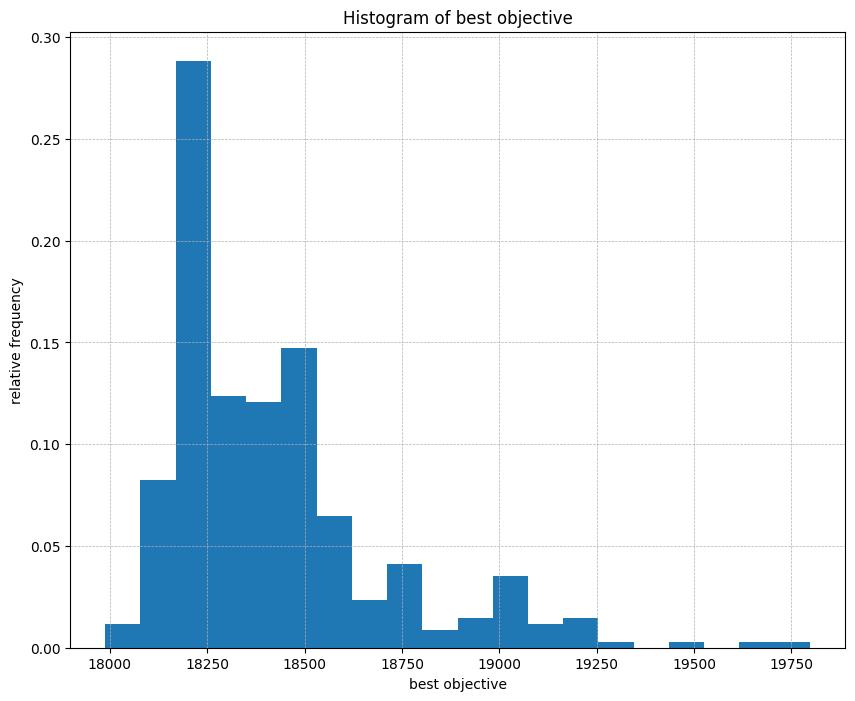

In [11]:
import matplotlib.pyplot as plt
from networkx import density
import numpy as np

counts,bin_edges = np.histogram(combined_df['best objective'],bins=20)
n_total = len(combined_df['best objective'])

relative_frequencies = counts/n_total
bin_widths = np.diff(bin_edges)
plt.figure(figsize=(10, 8))
plt.bar(bin_edges[:-1],relative_frequencies,bin_widths)
plt.title('Histogram of best objective')
plt.xlabel('best objective')
plt.ylabel('relative frequency')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
#combined_df['best objective'].hist(bins=20,density=True)
plt.show()

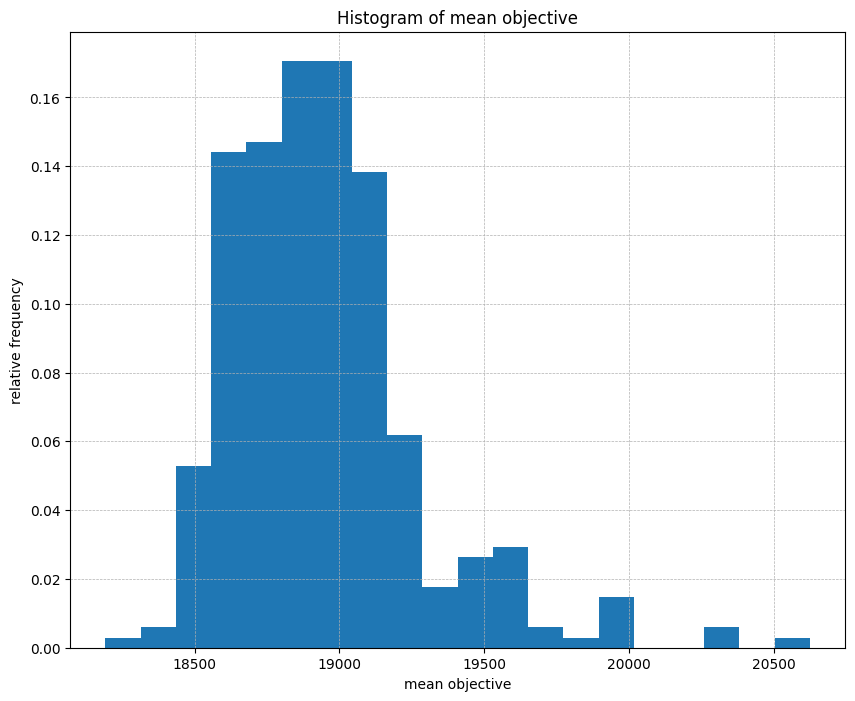

In [12]:
counts,bin_edges = np.histogram(combined_df['mean objective'],bins=20)
n_total = len(combined_df['mean objective'])

relative_frequencies = counts/n_total
bin_widths = np.diff(bin_edges)
plt.figure(figsize=(10, 8))
plt.bar(bin_edges[:-1],relative_frequencies,bin_widths)
plt.title('Histogram of mean objective')
plt.xlabel('mean objective')
plt.ylabel('relative frequency')
plt.grid(True, which='both', axis='both', linestyle='--', linewidth=0.5)
#combined_df['best objective'].hist(bins=20,density=True)
plt.show()